In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import maxabs_scale
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

In [56]:
#Задачи: Линейная регрессия
# 1. Разработать модель линейной регрессии, учитывающей все (в примере),2,3 столбца входных переменных. Рассчитать MSE. 
# Вывести значения коэффициентов модели.
# 2. Разработать модель линейной регрессии, базисные функции - полином от исходных значений. Найти зависимость MSE от
# максимальной степени полинома. (max_pow <= 10)
# 3. Регуляризация. Гребневая регрессия. Выбрать оптимальную степень полинома, 
# построить график зависимости максимального модуля параметров, MSE 
# от величины alpha.
# 4. Регуляризация. Лассо. Выбрать оптимальную степень полинома, 
# построить график зависимости максимального модуля параметров, MSE 
# от величины alpha. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# linear_model.Lasso(alpha=0.1)

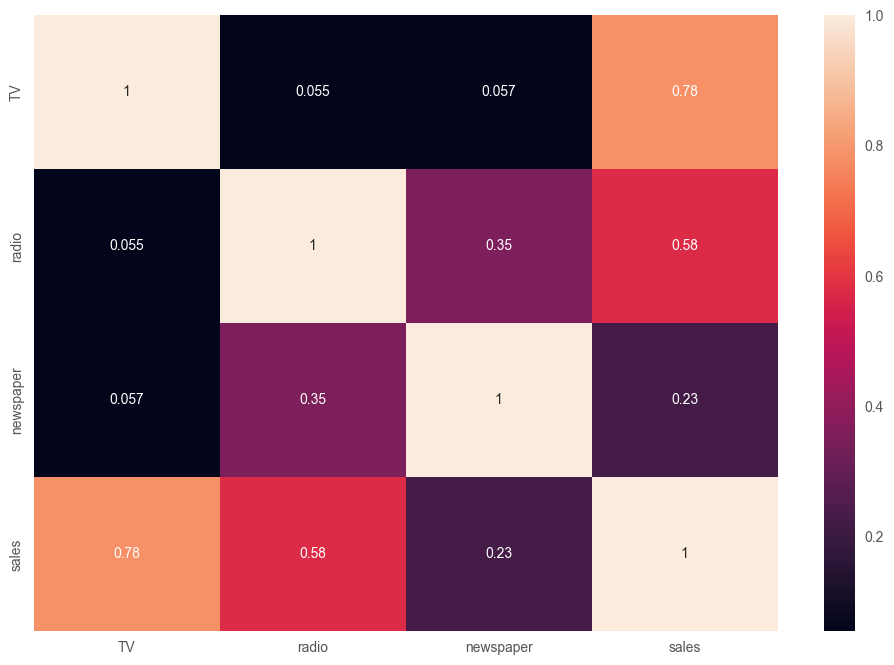

Свободный член -> 11.765576707409682
Коэффициенты модели -> [0.06888299]
[14.36246531 13.94227909 12.27531081 13.23967263 13.83206631]
MSE -> 25.196780034607826


In [57]:
df = pd.read_csv("C:/Users/vadim/Downloads/Лекция 5. Bayes, knn, svm/Лекция 5. Bayes, knn, svm/Advertising (1).csv")
df.head()
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

df.drop(df.columns[[0]], axis = 1, inplace = True) 
sns.heatmap(df.corr(),annot=True)
plt.show()
X = df[['newspaper']]
y = df.sales
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
print(f"Свободный член -> {model.intercept_}")
print(f"Коэффициенты модели -> {model.coef_}")
y_pred = model.predict(X_test) 
print(y_pred[:5])

MSE = mean_squared_error(y_test, y_pred)
print(f"MSE -> {MSE}")

mse_values = []

In [58]:
# 1
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

MSE = mean_squared_error(y_test, y_pred)

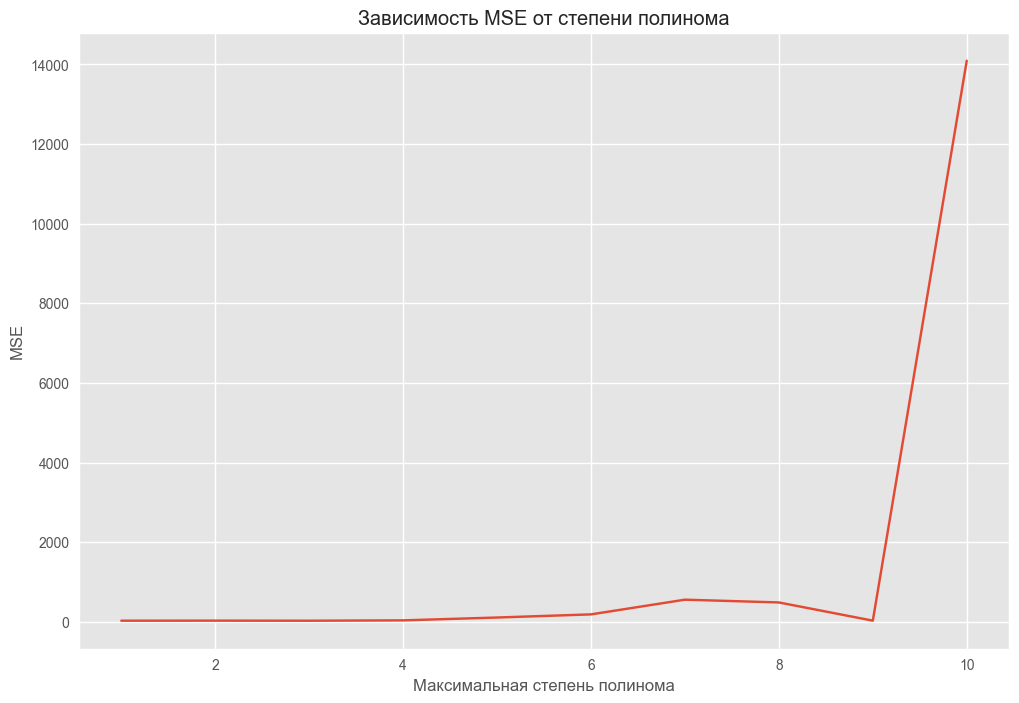

In [59]:
# 2
mse_list = []
for max_pow in range(1, 11):

    poly_features = PolynomialFeatures(degree=max_pow)
    X_train_poly = poly_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    X_test_poly = poly_features.transform(X_test)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

plt.plot(range(1, 11), mse_list)
plt.xlabel("Максимальная степень полинома")
plt.ylabel("MSE")
plt.title("Зависимость MSE от степени полинома")
plt.show()

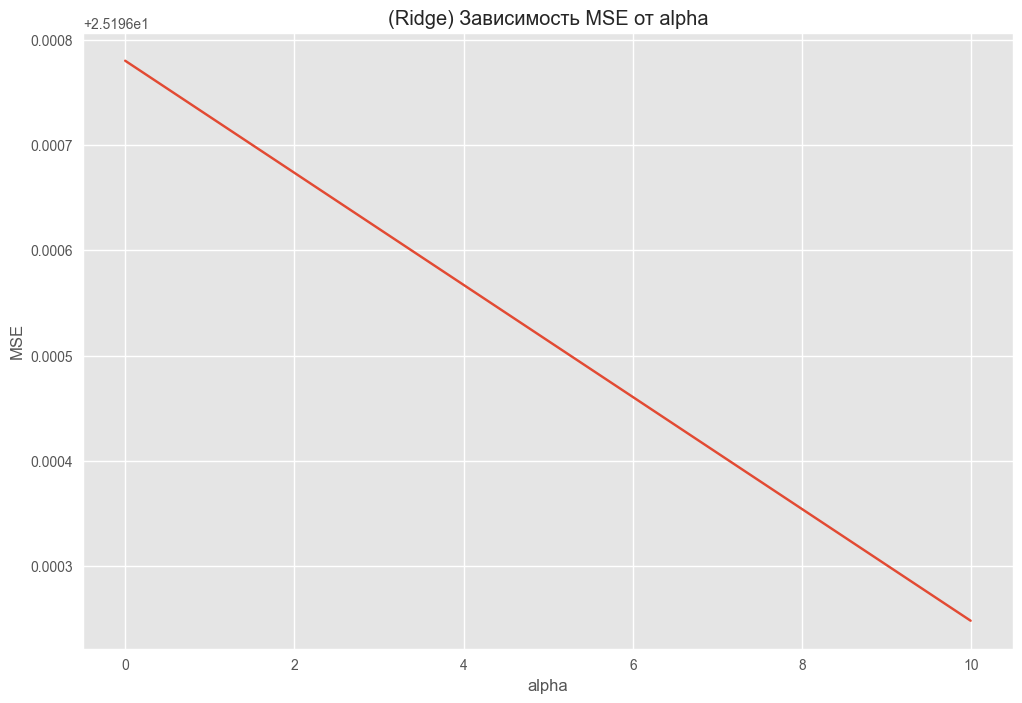

In [60]:
# 3
mse_list = []
for alpha in np.arange(0, 10, 0.01):

    model = Ridge(alpha= alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)


plt.plot(np.arange(0, 10, 0.01), mse_list)
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("(Ridge) Зависимость MSE от alpha")
plt.show()

In [69]:
# 4
mse_values = []

for alpha in np.arange(0.01, 10, 0.01):

    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)


In [70]:
#SVR
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
# Исследовать точность модели регрессии при применении  ядерных функций 'poly', 'sigmoid'
# Реализовать модель SVRб учитывающую все характеристики исходных данных, выбрать модель с оптимальными параметрами.

In [71]:
from sklearn.model_selection import GridSearchCV
kernels = ['poly', 'sigmoid']
results = {}

In [72]:
from sklearn.metrics import mean_absolute_error
for kernel in kernels:
    
    param_grid = {
        'C': [0.1, 1, 10],
        'epsilon': [0.1, 0.2, 0.5],
        'degree': [2, 3, 4] if kernel == 'poly' else [3],
        'coef0': [0.0, 0.5, 1.0],
    }
    
    svr = SVR(kernel=kernel)
    grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    results[kernel] = {
        'best_params': grid_search.best_params_,
        'model': best_model
    }
    
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[kernel]['mse'] = mse
    results[kernel]['mae'] = mae
    results[kernel]['r2'] = r2

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [73]:
for kernel in results:
    print(f"{kernel} -> MSE: {results[kernel]['mse']:.4f}, MAE: {results[kernel]['mae']:.4f}, R2: {results[kernel]['r2']:.4f}")

poly -> MSE: 31.3725, MAE: 4.4278, R2: -0.3417
sigmoid -> MSE: 27.4732, MAE: 4.1918, R2: -0.1749
